# Timing mat_complex

This code uses the magic function `%timeit`<sup> 1 2 </sup> to measure the excetution time of the function `matvec_complex`.

* <sup> 1 </sup>[Profiling and Timing Code - excerpt from the Python Data Science Handbook by Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/01.07-timing-and-profiling.html)

* <sup> 2 </sup>[Python documentation - timeit — Measure execution time of small code snippets](https://docs.python.org/3/library/timeit.html)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import functions as fcs
from tqdm.notebook import tqdm as tq # produce the progress bar

In [2]:
# number of elements forming the vectors
N = np.array([100, 300, 500, 700, 1000])

In [3]:
list_time_dumb = []
list_time_numba = []
list_time_dot = []
list_time_columns = []
list_time_numpy = []
for Ni in tq(N):
    matrix = np.ones((Ni,Ni))
    vector = np.ones(Ni)
    # matvec_real_dumb
    time = %timeit -o fcs.matvec_complex(matrix, vector, function='dumb')
    list_time_dumb.append(time.average)
    # matvec_real_numba
    time = %timeit -o fcs.matvec_complex(matrix, vector, function='numba')
    list_time_numba.append(time.average)
    # matvec_real_dot
    time = %timeit -o fcs.matvec_complex(matrix, vector, function='dot')
    list_time_dot.append(time.average)
    # matvec_real_columns
    time = %timeit -o fcs.matvec_complex(matrix, vector, function='columns')
    list_time_columns.append(time.average)
    # numpy.dot
    time = %timeit -o np.dot(matrix, vector)
    list_time_numpy.append(time.average)

37.6 ms ± 1.01 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
85.8 µs ± 36.9 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
626 µs ± 40.6 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.05 ms ± 67.7 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
4.41 µs ± 19.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
342 ms ± 12.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
469 µs ± 16.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.31 ms ± 161 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
7.71 ms ± 286 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
15.1 µs ± 518 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
928 ms ± 7.25 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.25 ms ± 26.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
3.98 ms ± 45.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
17.7 ms ± 126 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
29 µs ± 

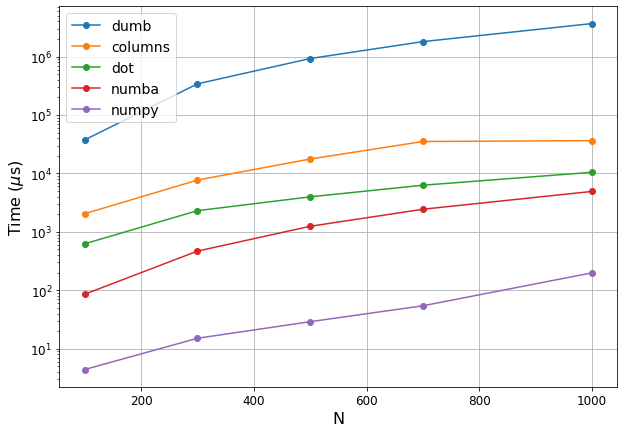

In [4]:
plt.figure(figsize=(10,7))
plt.plot(N, np.asarray(list_time_dumb)*1e6, 'o-', label = 'dumb')
plt.plot(N, np.asarray(list_time_columns)*1e6, 'o-', label = 'columns')
plt.plot(N, np.asarray(list_time_dot)*1e6, 'o-', label = 'dot')
plt.plot(N, np.asarray(list_time_numba)*1e6, 'o-', label = 'numba')
plt.plot(N, np.asarray(list_time_numpy)*1e6, 'o-', label = 'numpy')
plt.legend(loc = 'best', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('N', fontsize = 16)
plt.ylabel('Time ($\mu$s)', fontsize = 16)
plt.yscale('log')
plt.grid()
plt.show()